In [1]:
library(ggplot2)
library(plyr)
library(dplyr)
library(data.table)
library(readxl)
library(tidyr)
library(tidyverse)
library(grid)
library(gridExtra)
library(survival)
library(survminer)
library(stringr)
library(patchwork)

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200) 
options(repr.plot.width = 6, repr.plot.height = 6)


载入程辑包：'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



载入程辑包：'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v lubridate 1.9.2     v stringr   1.5.0
v purrr     1.0.1     v tibble    3.2.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()      masks plyr::arrange()
x data.table::between() masks dplyr::between()
x purrr::compact()      masks plyr::compact()
x dplyr::count()        masks plyr::count()
x dplyr::desc()         masks plyr::desc()
x dplyr::failwith()     masks plyr::failwith()
x dplyr::filte

## read Multi Region data

In [2]:
meta_multi_region_merged_diversity<-read.csv("meta_multi_region_merged_diversity_IGH.csv",header=TRUE,quote = "\"", skipNul = TRUE,check.names=FALSE)

meta_multi_region_merged_diversity$V<-str_extract(meta_multi_region_merged_diversity$V,pattern = ".*(?=\\*)")
meta_multi_region_merged_diversity$J<-str_extract(meta_multi_region_merged_diversity$J,pattern = ".*(?=\\*)")
meta_multi_region_merged_diversity$type<-factor(meta_multi_region_merged_diversity$type,levels=c("T1","T2","T3","T4","T5","N","L1","L2","L3","L4"))
head(meta_multi_region_merged_diversity)

,Patient_ID,Gender,Age,Location,Smoking_status,Drinking_status,T,N,M,TNM,Tumor_grade,Lymphatic_metastasis,Surgery_date,Follow-up_date,Followup_death_date1,Death_date,Survival_status,Survival_time,Chemotherapy,Radiotherapy,Other_therapy,ID,Cohort,Count,Frequency,CDR3nt,CDR3aa,V,D,J,C,cid,cid_full_length,type,s_richness,s_shannon,s_clonality,IGHM_proportion_unique,IGHM_proportion_redundant,s_richness_IGHM,s_count_IGHM,IGHD_proportion_unique,IGHD_proportion_redundant,s_richness_IGHD,s_count_IGHD,IGHA1_proportion_unique,IGHA1_proportion_redundant,s_richness_IGHA1,s_count_IGHA1,IGHA2_proportion_unique,IGHA2_proportion_redundant,s_richness_IGHA2,s_count_IGHA2,IGHG1_proportion_unique,IGHG1_proportion_redundant,s_richness_IGHG1,s_count_IGHG1,IGHG2_proportion_unique,IGHG2_proportion_redundant,s_richness_IGHG2,s_count_IGHG2,IGHG3_proportion_unique,IGHG3_proportion_redundant,s_richness_IGHG3,s_count_IGHG3,IGHG4_proportion_unique,IGHG4_proportion_redundant,s_richness_IGHG4,s_count_IGHG4,IGHE_proportion_unique,IGHE_proportion_redundant,s_richness_IGHE,s_count_IGHE
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,17,0.08947368,TGTGCGAGACAAACACACTCACGTTTTTCGTGGAGGGACCTCTACGGTTTGGACGTCTGG,CARQTHSRFSWRDLYGLDVW,IGHV4-39,IGHD3-10*01,IGHJ4,IGHG1,assemble2,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
2,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,9,0.04736842,TGTGCGAGACGCCGGACGTATAACTGGAACGACCGGTACTTTGACTACTGG,CARRRTYNWNDRYFDYW,IGHV4-59,IGHD1-20*01,IGHJ4,IGHM,assemble12,1,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
3,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,8,0.04210526,TGTGCGAGACATGAGCGTCAGAAACGGGGGTGGATACCAGCTGCCCCTCGGTTCGACCCCTGG,CARHERQKRGWIPAAPRFDPW,IGHV4-39,IGHD5-18*01,IGHJ5,IGHA1,assemble3,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
4,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,6,0.03157895,TGTGGTAGACATAAACCCCACCTCCTAGGGGTACTGGTGGTCGCTGCTACTGCATTTGACTACTGG,CGRHKPHLLGVLVVAATAFDYW,IGHV4-39,IGHD2-15*01,IGHJ4,IGHA1,assemble141,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
5,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,6,0.03157895,TGTGCGAGAGATGCATCCCGGTTCGACCCCTGG,CARDASRFDPW,IGHV4-59,IGHD5-24*01,IGHJ5,IGHA1,assemble1310,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0
6,ESCC001,Male,60,Middle,never,never,T3,N0,M0,Ⅱb,G2,No,2016-05-26,42949,NA,NA,0,14,无,无,无,ESCC001N,Multi_region,5,0.02631579,TGTGCGAGGTCCAGTAGAGCAGCTGGACTCGACCGCGTATGGAAGGGTTTCTACTACTACTACTACATGGACGTCTGG,CARSSRAAGLDRVWKGFYYYYYMDVW,IGHV3-11,IGHD6-6*01,IGHJ6,IGHM,assemble362,0,N,14,2.482157,0.05945309,0.1428571,0.175,2,14,0,0,0,0,0.5,0.425,7,34,0.07142857,0.0625,1,5,0.2142857,0.3,3,24,0.07142857,0.0375,1,3,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#IG类型比较
mypal <- ggsci::pal_npg(palette ="nrc", alpha = 0.7)(10)
mypal2<-ggsci::pal_jama(palette ="default", alpha = 0.7)(6)
mypal3<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.7)(9)
mypal4 <- ggsci::pal_npg(palette ="nrc", alpha = 0.5)(10)
mypal5<-ggsci::pal_jama(palette ="default", alpha = 0.5)(6)
mypal6<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.5)(9)
mypal7 <- ggsci::pal_npg(palette ="nrc", alpha = 0.3)(10)
mypal8<-ggsci::pal_jama(palette ="default", alpha = 0.3)(6)
mypal9<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.3)(9)

mypal<-c(mypal3,mypal2,mypal,mypal6,mypal5,mypal4,mypal9,mypal8,mypal7)
mypal[3]<-"#FFBD7A"


CDR3 length-MR

## 长度分布计算，mean+-SE

In [4]:
data=meta_multi_region_merged_diversity
data$cdr3_length=str_length(data$CDR3aa)
data$type=substr(data$type,1,1)

In [5]:
len_distr_all_long<-tibble()
for (p in unique(data$Patient_ID)){
data_p<-data[data$Patient_ID==p,]

len_distr<-table(data_p$type,data_p$cdr3_length) %>% as.data.frame()
len_distr$Patient_ID=p
colnames(len_distr)<-c("type","CDR3aa_length","Freq","Patient_ID")
len_distr_all_long<-rbind(len_distr_all_long,len_distr)
}

len_distr_all_long$type<-factor(len_distr_all_long$type,levels=c("T","N","L"))

levels(len_distr_all_long$CDR3aa_length)
levels(len_distr_all_long$CDR3aa_length)<-levels(len_distr_all_long$CDR3aa_length)[order(as.numeric(levels(len_distr_all_long$CDR3aa_length)))]
levels(len_distr_all_long$CDR3aa_length)

p<- ggplot(len_distr_all_long, aes(x = CDR3aa_length, y = Freq, fill = type,col=type,group=type)) +
      geom_point(stat = "summary", fun = mean,  position = position_dodge()) +
      geom_line(stat = "summary", fun = mean, position = position_dodge()) +
      stat_summary(fun.data = 'mean_se', geom = "errorbar", colour = "black",
                             width = 0.25,position = position_dodge( .9))

[1] "7"  "8"  "9"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "20" "21"
[16] "22" "23" "24" "25" "26" "27" "28" "30" "31" "32" "35" "29" "33" "6"  "37"
[31] "54" "57" "34" "41" "50" "46" "36" "38" "42" "39" "44" "48" "43" "40" "47"

[1] "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "20"
[16] "21" "22" "23" "24" "25" "26" "27" "28" "29" "30" "31" "32" "33" "34" "35"
[31] "36" "37" "38" "39" "40" "41" "42" "43" "44" "46" "47" "48" "50" "54" "57"

In [6]:
len_distr_all_long<-tibble()
for (p in unique(data$Patient_ID)){
data_p<-data[data$Patient_ID==p,]

len_distr<-prop.table(table(data_p$type,data_p$cdr3_length),margin=1) %>% as.data.frame()
len_distr$Patient_ID=p
colnames(len_distr)<-c("type","CDR3aa_length","Freq","Patient_ID")
len_distr_all_long<-rbind(len_distr_all_long,len_distr)
}

len_distr_all_long$type<-factor(len_distr_all_long$type,levels=c("T","N","L"))

levels(len_distr_all_long$CDR3aa_length)
levels(len_distr_all_long$CDR3aa_length)<-levels(len_distr_all_long$CDR3aa_length)[order(as.numeric(levels(len_distr_all_long$CDR3aa_length)))]
levels(len_distr_all_long$CDR3aa_length)

[1] "7"  "8"  "9"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "20" "21"
[16] "22" "23" "24" "25" "26" "27" "28" "30" "31" "32" "35" "29" "33" "6"  "37"
[31] "54" "57" "34" "41" "50" "46" "36" "38" "42" "39" "44" "48" "43" "40" "47"

[1] "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "20"
[16] "21" "22" "23" "24" "25" "26" "27" "28" "29" "30" "31" "32" "33" "34" "35"
[31] "36" "37" "38" "39" "40" "41" "42" "43" "44" "46" "47" "48" "50" "54" "57"

In [9]:
#跳过~
c2b<-len_distr_all_long %>% group_by(type,CDR3aa_length) %>% summarise_at(.vars = colnames(.)[3],funs(mean,sd,length))
c2b$se=c2b$sd/sqrt(c2b$length)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
i Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


#### TNL长度分布差异检验

In [10]:
write.csv(len_distr_all_long,"Fig2E.csv",row.names=FALSE,quote=FALSE)
len_distr_all_long[1:3,]

,type,CDR3aa_length,Freq,Patient_ID
,<fct>,<fct>,<dbl>,<chr>
1,N,6,0.0000000000,ESCC001
2,T,6,0.0005688282,ESCC001
3,N,7,0.0000000000,ESCC001


Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
i Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"
Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"
Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"
Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"


[1] 0.026
[1] 0.274
[1] 0.737


Warning message:
"Removed 496 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 496 rows containing non-finite values (`stat_summary()`)."


null device 
          1

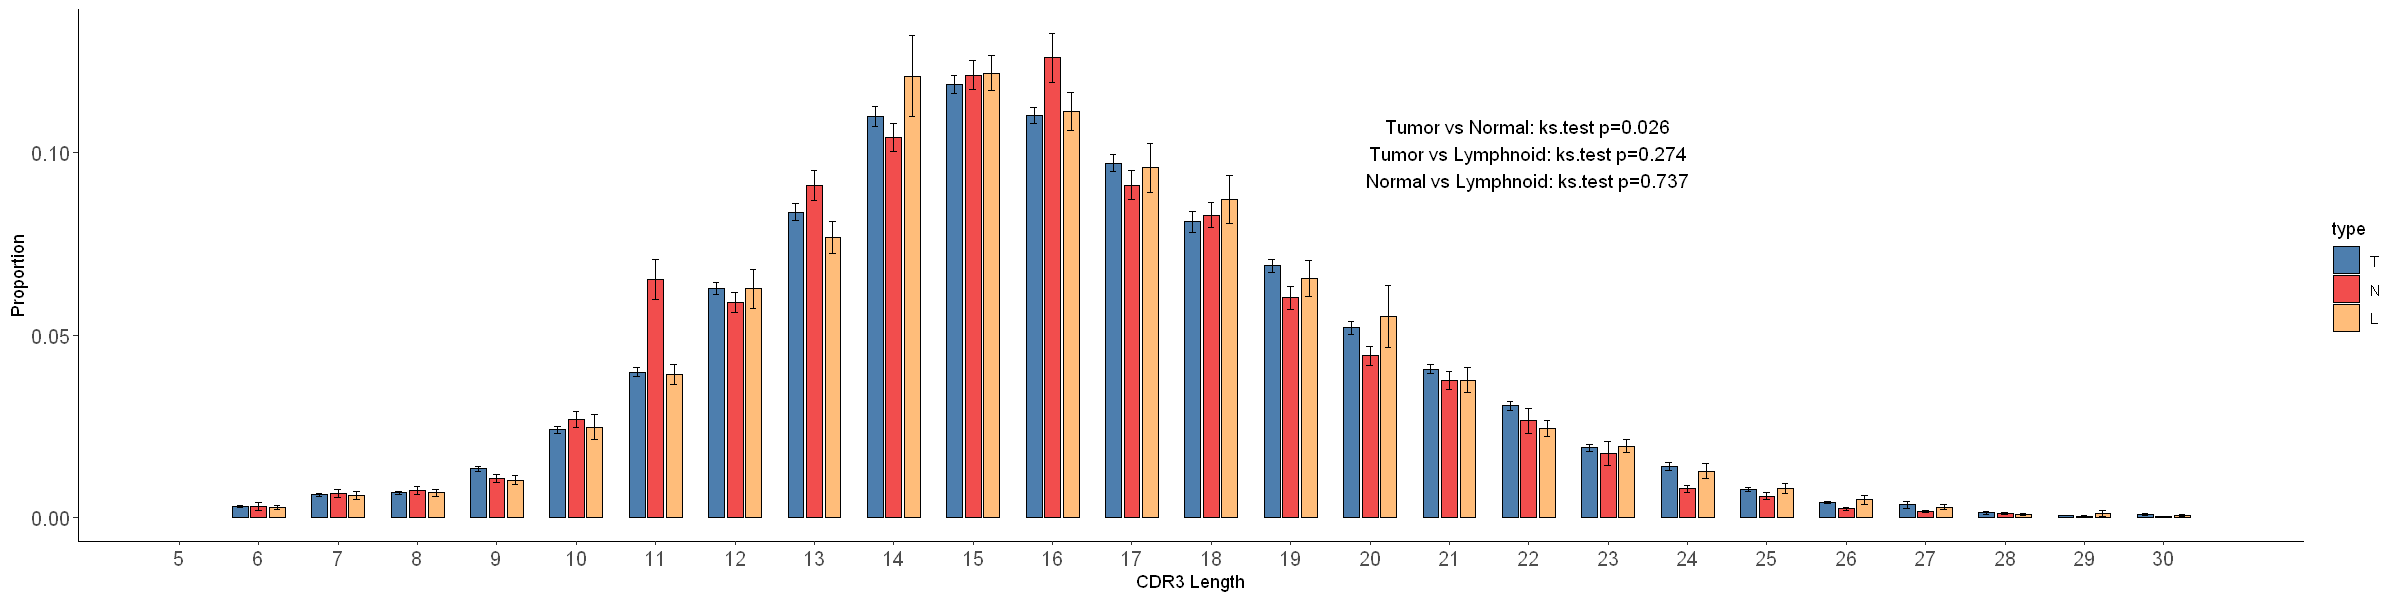

In [7]:
options(repr.plot.width = 20, repr.plot.height = 5)

temp<-len_distr_all_long
temp$CDR3aa_length<-as.numeric(as.character(temp$CDR3aa_length))

#Kolmogorov-Smirnov test
c2b<-len_distr_all_long %>% group_by(type,CDR3aa_length) %>% summarise_at(.vars = colnames(.)[3],funs(mean,sd,length))
x=c2b$mean[c2b$type=="T"]
y=c2b$mean[c2b$type=="N"]
TvN<-ks.test(x,y)$p.value%>% round(.,digit=3)


x=c2b$mean[c2b$type=="T"]
y=c2b$mean[c2b$type=="L"]
TvL<-ks.test(x,y)$p.value%>% round(.,digit=3)

x=c2b$mean[c2b$type=="N"]
y=c2b$mean[c2b$type=="L"]
NvL<-ks.test(x,y)$p.value %>% round(.,digit=3)

print(TvN)
print(TvL)
print(NvL)

p<- ggplot(temp, aes(x = CDR3aa_length, y = Freq, fill = type,col=type,group=type)) +
      geom_bar(stat = "summary", fun = mean, colour = "black", position = position_dodge(0.7),width = .6) +
      #geom_line(stat = "summary", fun = mean, position = position_dodge(0.9),size=1) +
      stat_summary(fun.data = 'mean_se', geom = "errorbar", colour = "black",
                             width = 0.25,position = position_dodge( .7))+    
      scale_fill_manual(values=mypal)+
      labs(x='CDR3 Length',y='Proportion')+
      theme_classic()+
      annotate("text", size=4, x=22, y=0.1, label=paste("Tumor vs Normal: ks.test p=",TvN,"\n","Tumor vs Lymphnoid: ks.test p=",TvL,"\n","Normal vs Lymphnoid: ks.test p=",NvL,sep=""))+
      #theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
      theme(axis.text = element_text(size = 12))+
    scale_x_continuous(breaks=seq(5,30,1),limits = c(5,30.5))
    
p
#pdf("Fig2.CDR3_length_MR_5_30.pdf",8,2)
#p
dev.off()

Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"Removed 5524 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 5524 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 5524 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 5524 rows containing non-finite values (`stat_summary()`)."


png 
  2

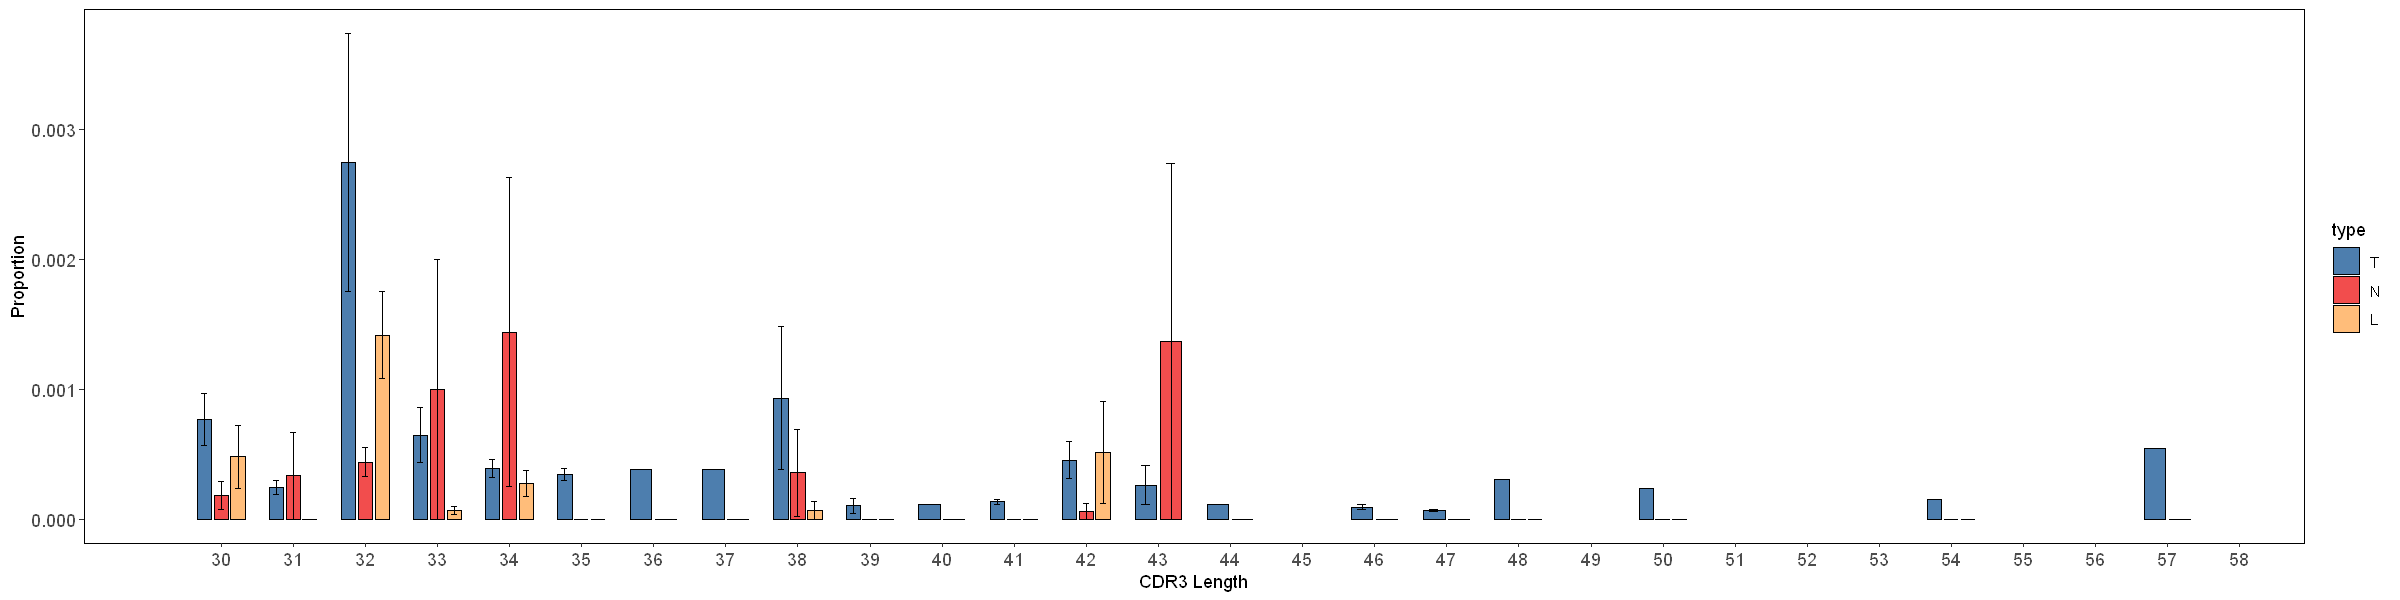

In [14]:
options(repr.plot.width = 20, repr.plot.height = 5)

temp<-len_distr_all_long
temp$CDR3aa_length<-as.numeric(as.character(temp$CDR3aa_length))

p<- ggplot(temp, aes(x = CDR3aa_length, y = Freq, fill = type,col=type,group=type)) +
      geom_bar(stat = "summary", fun = mean, colour = "black", position = position_dodge(0.7),width = .6) +
      #geom_line(stat = "summary", fun = mean, position = position_dodge(0.9),size=1) +
      stat_summary(fun.data = 'mean_se', geom = "errorbar", colour = "black",
                             width = 0.25,position = position_dodge( .7))+    
      scale_fill_manual(values=mypal)+
      labs(x='CDR3 Length',y='Proportion')+
      theme_classic()+
      theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
      theme(axis.text = element_text(size = 11))+
    scale_x_continuous(breaks=seq(30,58,1),limits = c(29.5,57.5))

p
pdf("CDR3_length_MR_30_57.pdf",7,3)
p
dev.off()